# Exploratory Data Analysis

## Setup ##

In [1]:
import numpy as np 
import pandas as pd
import random
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import preprocessing

In [2]:
articles = pd.read_csv('../data/articles.csv')
customers = pd.read_csv('../data/customers.csv')
sample_submisison = pd.read_csv('../data/sample_submission.csv')
transactions = pd.read_csv('../data/transactions_train.csv')

## Articles ##

In [3]:
articles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105542 entries, 0 to 105541
Data columns (total 25 columns):
 #   Column                        Non-Null Count   Dtype 
---  ------                        --------------   ----- 
 0   article_id                    105542 non-null  int64 
 1   product_code                  105542 non-null  int64 
 2   prod_name                     105542 non-null  object
 3   product_type_no               105542 non-null  int64 
 4   product_type_name             105542 non-null  object
 5   product_group_name            105542 non-null  object
 6   graphical_appearance_no       105542 non-null  int64 
 7   graphical_appearance_name     105542 non-null  object
 8   colour_group_code             105542 non-null  int64 
 9   colour_group_name             105542 non-null  object
 10  perceived_colour_value_id     105542 non-null  int64 
 11  perceived_colour_value_name   105542 non-null  object
 12  perceived_colour_master_id    105542 non-null  int64 
 13 

In [4]:
# Based on info, only missing values in detail_desc column
# Count how many rows
articles["detail_desc"].isna().sum()

416

In [7]:
# Verify whether there is a clear reason why these rows have no description
articles[articles["detail_desc"].isna()].head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
1467,351332007,351332,Marshall Lace up Top,252,Sweater,Garment Upper body,1010018,Treatment,7,Grey,...,Jersey Fancy DS,D,Divided,2,Divided,58,Divided Selected,1005,Jersey Fancy,NaN
2644,420049002,420049,OL TAGE PQ,87,Boots,Shoes,1010016,Solid,13,Beige,...,Premium Quality,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,NaN
2645,420049003,420049,OL TAGE PQ,87,Boots,Shoes,1010016,Solid,23,Dark Yellow,...,Premium Quality,C,Ladies Accessories,1,Ladieswear,64,Womens Shoes,1020,Shoes,NaN
2742,426199002,426199,Ellen Shortie Daisy Low 3p,286,Underwear bottom,Underwear,1010016,Solid,9,Black,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",NaN
2743,426199010,426199,Ellen Shortie Daisy Low 3p,286,Underwear bottom,Underwear,1010017,Stripe,8,Dark Grey,...,Casual Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear",NaN


In [13]:
articles["colour_group_name"].describe()

count     105542
unique        50
top        Black
freq       22670
Name: colour_group_name, dtype: object

<AxesSubplot:>

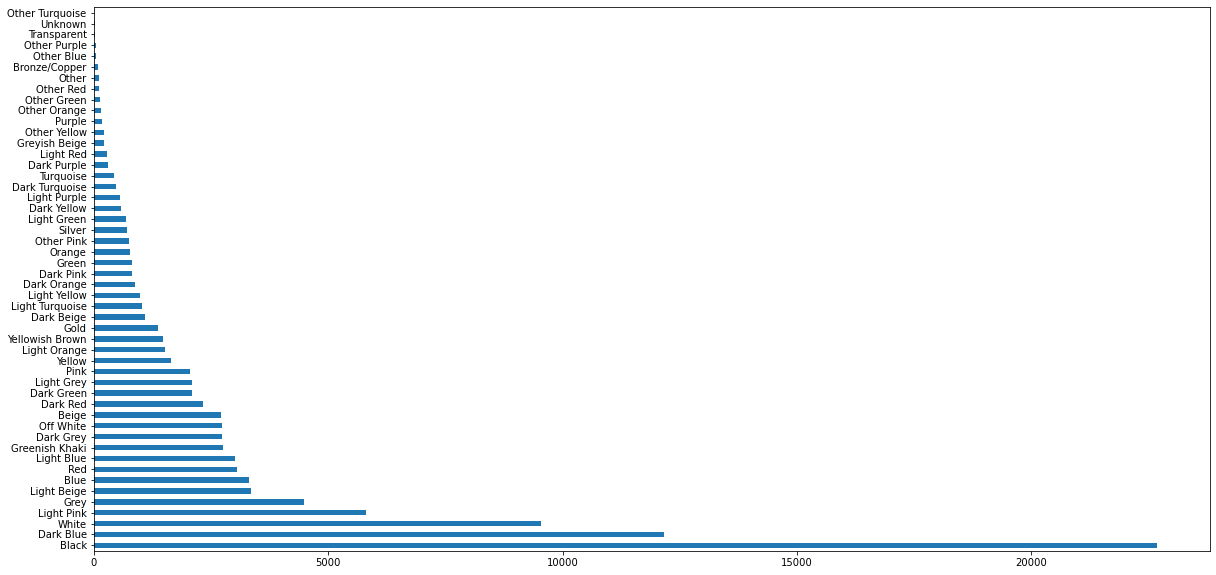

In [17]:
# Black seems to be very frequent, rougly 1/5th of clothes are Black. Let's see how this compares to the other 49 
# colours.
articles["colour_group_name"].value_counts().plot.barh(figsize=(20, 10))

In [23]:
# check if group name always matches code
articles[["colour_group_name", "colour_group_code"]].groupby(["colour_group_code"]).nunique().eq(1)

,colour_group_name
colour_group_code,
-1,True
1,True
2,True
3,True
4,True
5,True
6,True
7,True
8,True


In [27]:
articles["graphical_appearance_name"].describe()

count     105542
unique        30
top        Solid
freq       49747
Name: graphical_appearance_name, dtype: object

<AxesSubplot:>

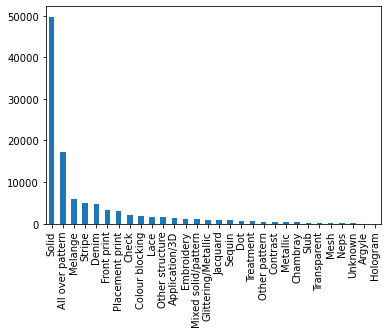

In [29]:
articles["graphical_appearance_name"].value_counts().plot.bar()

Compare perceived colour value and master 

In [32]:
articles["perceived_colour_value_name"].describe()

count     105542
unique         8
top         Dark
freq       42706
Name: perceived_colour_value_name, dtype: object

In [33]:
articles["perceived_colour_master_name"].describe()

count     105542
unique        20
top        Black
freq       22585
Name: perceived_colour_master_name, dtype: object

<AxesSubplot:>

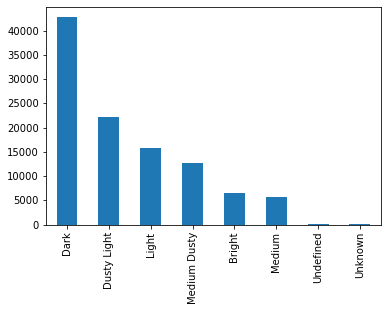

In [34]:
articles["perceived_colour_value_name"].value_counts().plot.bar()

<AxesSubplot:>

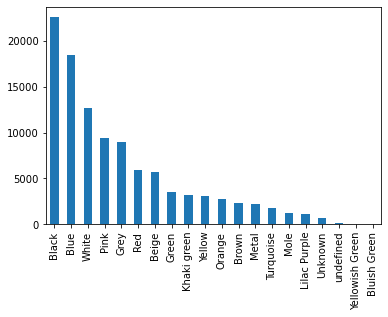

In [35]:
articles["perceived_colour_master_name"].value_counts().plot.bar()

### Customers

In [39]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      476930 non-null   float64
 2   Active                  464404 non-null   float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [44]:
customers["FN"].isna().sum()

895050

In [45]:
customers["FN"].value_counts()

1.0    476930
Name: FN, dtype: int64

In [46]:
customers["Active"].isna().sum()

907576

In [47]:
customers["Active"].value_counts()

1.0    464404
Name: Active, dtype: int64

In [53]:
customers[customers["Active"].isna() & customers["FN"] == 1]

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
137,0005c68366e7955683b7cdc75535f400d76c2e713b6277...,1.0,NaN,ACTIVE,Regularly,43.0,52205389e515cded514c95fb56029ef05f29c189bc706a...
249,000b2018cebd824b6abdcbe9a9178067124ea4516a2d8c...,1.0,NaN,ACTIVE,Regularly,22.0,efe02004f43b4fbe5cc30862bc536832f8430bbfae1c8e...
335,00100a3fbf886724f574b726bdb47cf5b4fba1acbd2cc4...,1.0,NaN,ACTIVE,NONE,22.0,f187902768ee417d3a60f1bbf75ce8f1e7c3fee0faf76b...
438,0014a050e53bac4c5bd56296afbbea26d542fe4340a559...,1.0,NaN,ACTIVE,Regularly,56.0,331678faef3b54c05725daa112632274feb760552d84f8...
478,00163db01b48157e99b49618eee91ef265c193414cfb0a...,1.0,NaN,ACTIVE,Regularly,27.0,0416417bc05524c8407d92efa229f8c94ffb9abd45ffa8...
...,...,...,...,...,...,...,...
1371316,ffe044fa37ae4786bc6c8081c077daae5b203a9f8a2d8f...,1.0,NaN,ACTIVE,Regularly,19.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...
1371409,ffe425daffac91b6bf77c8a4bb181c4866e3c4a08cbf79...,1.0,NaN,ACTIVE,Regularly,23.0,cc33da67515e2aacf19cfeb38afcc87db10f9fcefb4617...
1371457,ffe653a2cf91f6f353b6333b659c7d8d891a705913fa88...,1.0,NaN,ACTIVE,Regularly,23.0,fe59ceaf169875b877c6fef2e339156183f71d8fd3c404...
1371489,ffe7cc22f132fe52ff777967e5a8769ca13bd5715c3934...,1.0,NaN,ACTIVE,Regularly,55.0,2c29ae653a9282cce4151bd87643c907644e09541abc28...


In [55]:
customers["club_member_status"].value_counts()

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

In [56]:
customers["fashion_news_frequency"].value_counts()

NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

In [57]:
customers["age"].describe()

count    1.356119e+06
mean     3.638696e+01
std      1.431363e+01
min      1.600000e+01
25%      2.400000e+01
50%      3.200000e+01
75%      4.900000e+01
max      9.900000e+01
Name: age, dtype: float64

<AxesSubplot:>

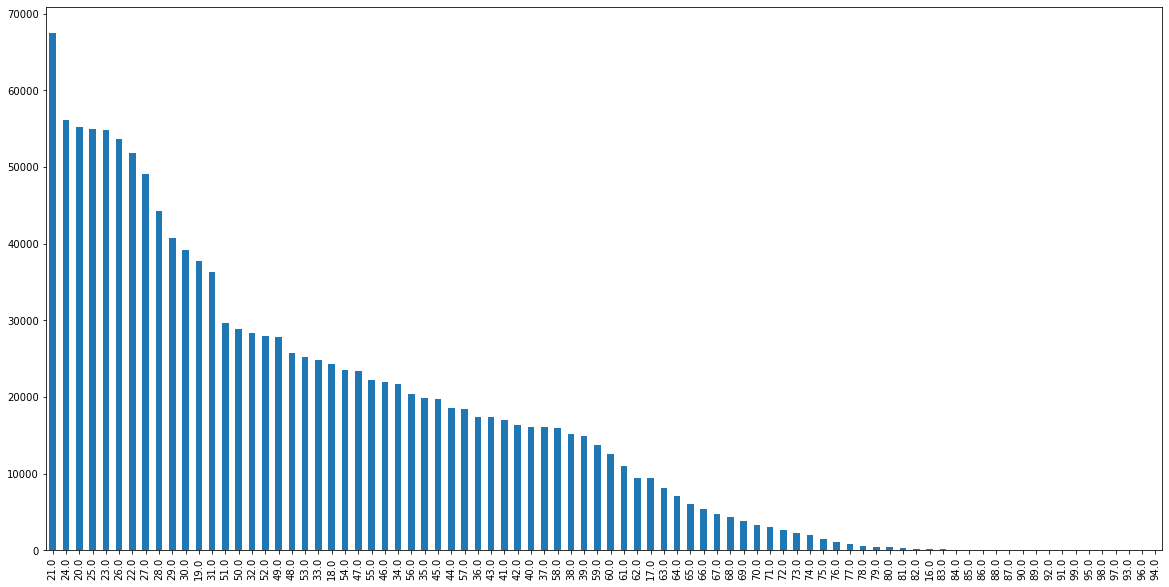

In [59]:
customers["age"].value_counts().plot.bar(figsize=(20, 10))

### Transactions

In [61]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31788324 entries, 0 to 31788323
Data columns (total 5 columns):
 #   Column            Dtype  
---  ------            -----  
 0   t_dat             object 
 1   customer_id       object 
 2   article_id        int64  
 3   price             float64
 4   sales_channel_id  int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ GB


In [71]:
transactions["sales_channel_id"].value_counts()

2    22379862
1     9408462
Name: sales_channel_id, dtype: int64

In [74]:
transactions["price"].describe()

count    3.178832e+07
mean     2.782927e-02
std      1.918113e-02
min      1.694915e-05
25%      1.581356e-02
50%      2.540678e-02
75%      3.388136e-02
max      5.915254e-01
Name: price, dtype: float64